# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?APPID="+api_keys.api_key + '&q='

In [47]:
response = requests.get(url + cities[0]).json()

<Response [400]>

In [48]:
name = []
temp_max = []
clouds = []
lat = []
wind = []
humidity = []


for city in cities:
    try:
        response=requests.get(url + city).json()
        #parse the data
        name.append(response['name'])
        temp_max.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
    except:
        print(city + ' not found')
        pass

kadykchan not found
taolanaro not found
bengkulu not found
rungata not found
jiroft not found
pafos not found
sentyabrskiy not found
porto santo not found
saleaula not found
tsihombe not found
tabiauea not found
manzil tamim not found
vaitupu not found
hakvik not found
hihifo not found
illoqqortoormiut not found
nizhneyansk not found
kilmez not found
amderma not found
gollere not found
varzea alegre not found
tumannyy not found
stoyba not found
paradwip not found
attawapiskat not found
azimur not found
asau not found
karkaralinsk not found
barentsburg not found
ardistan not found
grand river south east not found
ngukurr not found
odweyne not found
tsentralnyy not found
haarby not found
belushya guba not found
kazalinsk not found
mys shmidta not found
samusu not found
krasnoselkup not found
zlatoustovsk not found
palabuhanratu not found
kushmurun not found
gangotri not found
yambio not found
louisbourg not found
saryshagan not found
ozgon not found
khonuu not found
jabiru not found
shpy

In [49]:
df = pd.DataFrame({'city': name, 'temp_max': temp_max,'clouds': clouds, 'lat': lat, 'wind_speed': wind, 'humidity': humidity})

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
df.to_csv('weather.csv')

In [13]:
weatherpy = pd.read_csv("weather.csv")


In [14]:
weatherpy

,Unnamed: 0,city,temp_max,clouds,lat,wind_speed,humidity
0,0,Benguela,298.573,92,-12.58,0.11,100
1,1,Longyearbyen,272.150,40,78.22,10.30,63
2,2,Rikitea,300.848,0,-23.12,4.26,98
3,3,Pevek,245.698,32,69.70,3.21,77
4,4,College,250.950,20,64.86,3.56,68
5,5,Vila Velha,301.150,75,-3.71,4.60,83
6,6,Punta Arenas,281.150,75,-53.16,8.20,65
7,7,Bluff,306.998,24,-23.58,6.11,37
8,8,Busselton,298.723,0,-33.64,1.76,74
9,9,Torbay,267.150,40,47.66,12.30,57


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

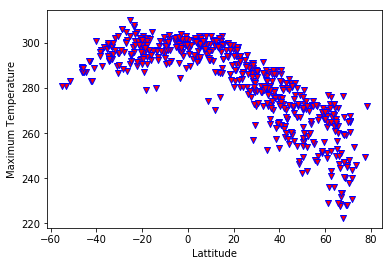

In [65]:
temp = plt.scatter(x = lat, y = temp_max, marker = 'v', color = 'red', edgecolors='blue')
plt.xlabel('Lattitude')
plt.ylabel('Maximum Temperature')
plt.savefig('temp.png')

#### Latitude vs. Humidity Plot

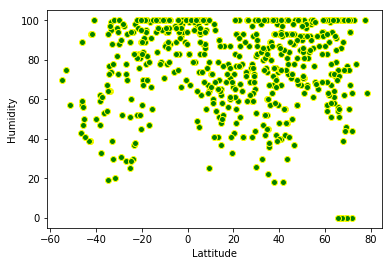

In [64]:
humid = plt.scatter(x = lat, y = humidity, marker = 'o', color = 'green', edgecolors='yellow')
plt.xlabel('Lattitude')
plt.ylabel('Humidity')
plt.savefig('humidity.png')

#### Latitude vs. Cloudiness Plot

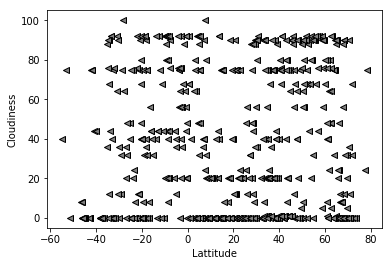

In [63]:
cloud = plt.scatter(x = lat, y = clouds, marker = '<', color = 'grey', edgecolors = 'black')
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')
plt.savefig('cloud.png')

#### Latitude vs. Wind Speed Plot

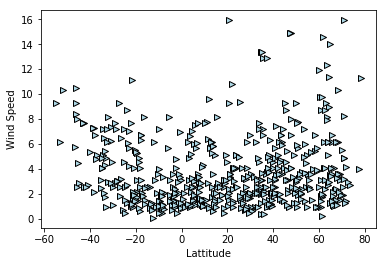

In [72]:
wind_speed = plt.scatter(x = lat, y = wind, marker = '>', color = 'lightblue', edgecolors = 'black')
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed')
plt.savefig('wind_speed.png')